In [2]:
from google.colab import files
uploaded = files.upload()

Saving Liq5YCDS.delim to Liq5YCDS.delim


In [17]:
import pandas as pd

cds_raw = pd.read_csv("Liq5YCDS.delim", delimiter='\t')

In [18]:
cds_raw = cds_raw.drop(columns=['Unnamed: 0'])

cds_raw['date'] = pd.to_datetime(cds_raw['date'])

cds = cds_raw.pivot(index='date', columns='ticker')

cds = cds.sort_index()

cds.head()

tenor                                      ... impliedrating       \
ticker       AES  BA   C   F  GE JPM LNC LOW LUV MAR  ...           LOW  LUV   
date                                                  ...                      
2018-01-01    5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  ...             A  BBB   
2018-01-02    5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  ...             A  BBB   
2018-01-03    5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  ...             A  BBB   
2018-01-04    5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  ...             A  BBB   
2018-01-05    5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  5Y  ...             A  BBB   

                                                
ticker      MAR MCD NFLX    T WFC  WHR XOM XRX  
date                                            
2018-01-01  BBB  AA  NaN  BBB   A  BBB   A  BB  
2018-01-02  BBB  AA  NaN  BBB   A  BBB   A  BB  
2018-01-03  BBB  AA  NaN  BBB   A  BBB   A  BB  
2018-01-04  BBB  AA  NaN  BBB   A  BBB   A  BB  
2018-01-05  BBB  AA  NaN  BBB   A  BBB   A  BB  

[5 rows x 170 columns]

In [19]:
cds_parspread = cds['parspread']

cds_parspread.head()

ticker,AES,BA,C,F,GE,JPM,LNC,LOW,LUV,MAR,MCD,NFLX,T,WFC,WHR,XOM,XRX
date,,,,,,,,,,,,,,,,,
2018-01-01,0.014813,0.001793,0.004113,0.008805,0.004037,0.003901,0.005817,0.001546,0.003107,0.003588,0.001952,NaN,0.005179,0.004261,0.005698,0.003387,0.018871
2018-01-02,0.014849,0.001768,0.004100,0.008663,0.004077,0.003855,0.005783,0.001450,0.003068,0.002330,0.001983,NaN,0.005181,0.004226,0.005578,0.003404,0.018839
2018-01-03,0.014619,0.001682,0.004080,0.008474,0.004076,0.003763,0.005742,0.001510,0.002989,0.002351,0.001970,NaN,0.005180,0.004190,0.005599,0.003408,0.018579
2018-01-04,0.014520,0.001659,0.003968,0.008306,0.004025,0.003752,0.005602,0.001397,0.002880,0.002314,0.001955,NaN,0.005180,0.004217,0.005634,0.003407,0.018024
2018-01-05,0.014486,0.001634,0.003909,0.008158,0.003995,0.003711,0.005595,0.001394,0.002772,0.002317,0.001938,NaN,0.005179,0.004155,0.005644,0.003404,0.017598


In [20]:
cds_wed = cds_parspread.resample('W-WED').last()
cds_wed.head()

ticker,AES,BA,C,F,GE,JPM,LNC,LOW,LUV,MAR,MCD,NFLX,T,WFC,WHR,XOM,XRX
date,,,,,,,,,,,,,,,,,
2018-01-03,0.014619,0.001682,0.004080,0.008474,0.004076,0.003763,0.005742,0.001510,0.002989,0.002351,0.001970,NaN,0.005180,0.004190,0.005599,0.003408,0.018579
2018-01-10,0.014198,0.001585,0.004070,0.008620,0.004115,0.003871,0.005620,0.001400,0.003126,0.002438,0.001866,NaN,0.005178,0.004199,0.005739,0.003370,0.016717
2018-01-17,0.013759,0.001728,0.004051,0.009427,0.004752,0.003792,0.005680,0.002029,0.003344,0.002773,0.001960,NaN,0.005182,0.004212,0.005799,0.003305,0.013237
2018-01-24,0.012101,0.001736,0.004076,0.010133,0.005974,0.003790,0.005689,0.002448,0.003590,0.002803,0.001972,NaN,0.005176,0.004162,0.005505,0.003202,0.014794
2018-01-31,0.012211,0.001708,0.003999,0.010397,0.005928,0.003711,0.005673,0.002598,0.003700,0.002602,0.002053,NaN,0.005179,0.004127,0.004985,0.003215,0.008158


In [21]:
rCDS = cds_wed.pct_change().dropna()
rCDS.head()

ticker,AES,BA,C,F,GE,JPM,LNC,LOW,LUV,MAR,MCD,NFLX,T,WFC,WHR,XOM,XRX
date,,,,,,,,,,,,,,,,,
2019-10-09,-0.005422,-0.054217,-0.020924,-0.007449,-0.011992,-0.014856,-0.025120,-0.066399,-0.057578,-0.055893,-0.087631,0.028091,0.001294,-0.002476,-0.028490,-0.000178,0.012865
2019-10-16,-0.122072,-0.090320,-0.120605,-0.100457,-0.062940,-0.190471,-0.088143,-0.122401,-0.106093,-0.108194,-0.111540,-0.045529,-0.000573,-0.128342,-0.087623,-0.001492,-0.057785
2019-10-23,-0.031879,0.160655,-0.051542,0.061085,0.005034,-0.030041,-0.037167,-0.060197,-0.018253,-0.030093,0.043431,0.023648,0.000056,-0.044596,-0.074319,0.001385,-0.054277
2019-10-30,-0.037369,0.076029,-0.024387,-0.108487,-0.073227,-0.068901,-0.022894,0.006818,-0.046385,-0.015210,0.002329,-0.045513,-0.000060,-0.054811,-0.019053,0.008991,-0.150298
2019-11-06,-0.026016,-0.005737,-0.050396,-0.039613,-0.168823,-0.039028,0.021852,-0.058665,-0.025435,-0.025854,0.056748,0.008463,-0.000990,-0.016882,-0.039368,0.000291,0.078012


In [16]:
!pip install yfinance --quiet
import yfinance as yf

tickers = list(rCDS.columns) + ['SPY']

start = cds_wed.index.min()
end   = cds_wed.index.max()

equity_prices = yf.download(
    tickers,
    start=start,
    end=end,
    auto_adjust=True
)['Close']

[*********************100%***********************]  18 of 18 completed


In [22]:
equity_wed = equity_prices.resample('W-WED').last()

rEquity = equity_wed.pct_change().dropna()

m = rEquity['SPY']

rEquity = rEquity.drop(columns=['SPY'])

In [23]:
common_dates = rCDS.index.intersection(rEquity.index)

rCDS = rCDS.loc[common_dates]
rEquity = rEquity.loc[common_dates]
m = m.loc[common_dates]

print("rCDS shape:", rCDS.shape)
print("rEquity shape:", rEquity.shape)
print("Market returns shape:", m.shape)

rCDS shape: (326, 17)
rEquity shape: (326, 17)
Market returns shape: (326,)


In [24]:
rIndex = rCDS.mean(axis=1)
rIndex.head()

,0
2019-10-09,-0.023316
2019-10-16,-0.090858
2019-10-23,-0.008063
2019-10-30,-0.033672
2019-11-06,-0.019497


Began by loading the raw CDS data, which contained daily 5-year CDS spreads for multiple companies along with other metadata. The data was tab-delimited and included columns such as ticker, tenor, upfront, runningcoupon, and impliedrating. Converted the date column to datetime format and pivoted the data so that each ticker became a separate column, keeping all associated fields in a MultiIndex. Then extracted the 5-year par spreads to focus on a consistent maturity across all tickers.

Resampled the daily data to weekly frequency, using Wednesday-to-Wednesday prices to mitigate irregular updates and Epps effect issues. Computed weekly CDS “returns” by taking percent changes of these weekly spreads. Downloaded daily equity prices for the same tickers from Yahoo Finance, as well as SPY as a market proxy, and resampled these to weekly Wednesday close prices. Weekly equity returns (rEquity) and market returns (m) were calculated as percent changes.

Finally, aligned all series by date so that CDS returns, equity returns, and market returns had matching indices. Computed a CDS index return as the arithmetic average across all tickers. This prepared dataset — consisting of rCDS, rEquity, m, and rIndex — is now ready for contemporaneous regression analysis, where CDS returns will be hedged using equity and index predictors.

In [25]:
import statsmodels.api as sm

def rolling_ols(y, X, window):
    """
    Compute rolling OLS coefficients.
    y: pd.Series (dependent)
    X: pd.DataFrame (independent variables)
    window: number of weeks
    Returns: DataFrame of coefficients, index aligned with y (NaN for first window-1 rows)
    """
    coefs = pd.DataFrame(index=y.index, columns=X.columns)

    for i in range(window, len(y)):
        y_window = y.iloc[i-window:i]
        X_window = X.iloc[i-window:i]
        X_window = sm.add_constant(X_window)  # add intercept
        model = sm.OLS(y_window, X_window).fit()
        coefs.iloc[i] = model.params[X.columns]  # only return beta (skip const)

    return coefs

In [27]:
K = 16  # window size

gamma = pd.DataFrame(index=rEquity.index, columns=rEquity.columns)

for ticker in rEquity.columns:
    y = rEquity[ticker]
    X = pd.DataFrame({'m': m})
    gamma[ticker] = rolling_ols(y, X, K)[X.columns[0]]

gamma.isna().sum(axis=1).head(20)

,0
2019-10-09,17
2019-10-16,17
2019-10-23,17
2019-10-30,17
2019-11-06,17
2019-11-13,17
2019-11-20,17
2019-11-27,17
2019-12-04,17
2019-12-11,17


In [29]:
beta_equity = pd.DataFrame(index=rCDS.index, columns=rCDS.columns)
beta_index = pd.DataFrame(index=rCDS.index, columns=rCDS.columns)

for ticker in rCDS.columns:
    y = rCDS[ticker]
    X = pd.DataFrame({
        'rEquity': rEquity[ticker],
        'rIndex': rIndex
    })
    betas = rolling_ols(y, X, K)
    beta_equity[ticker] = betas['rEquity']
    beta_index[ticker] = betas['rIndex']

In [31]:
f = beta_equity * rEquity
for ticker in rCDS.columns:
    f[ticker] += beta_index[ticker] * rIndex

In [33]:
rho = rCDS - f

c = rEquity - gamma.multiply(m, axis=0)

In [36]:
def predictive_regression_fixed(y, x, window=None, halflife=None):
    """
    Predictive regression: y_t ~ x_{t-1}
    Handles NaNs and ensures numeric dtype.
    """
    mu = pd.Series(index=y.index, dtype=float)

    y = y.astype(float)
    x = x.astype(float)
    x_lag = x.shift(1)

    for i in range(1, len(y)):
        start = max(0, i - (window or len(y)))
        y_window = y.iloc[start:i]
        x_window = x_lag.iloc[start:i]

        mask = y_window.notna() & x_window.notna()
        y_window = y_window[mask]
        x_window = x_window[mask]

        if len(y_window) < 2:
            continue

        if halflife is not None:
            weights = np.exp(np.log(0.5) * np.arange(len(y_window)-1, -1, -1)/halflife)
        else:
            weights = np.ones(len(y_window))

        Xw = sm.add_constant(x_window)
        model = sm.WLS(y_window, Xw, weights=weights).fit()
        mu.iloc[i] = model.params[x_window.name]

    return mu

In [37]:
mu_boxcar = pd.DataFrame(index=rCDS.index, columns=rCDS.columns, dtype=float)
mu_ewls = pd.DataFrame(index=rCDS.index, columns=rCDS.columns, dtype=float)

for ticker in rCDS.columns:
    mu_boxcar[ticker] = predictive_regression_fixed(rho[ticker], c[ticker], window=16)
    mu_ewls[ticker] = predictive_regression_fixed(rho[ticker], c[ticker], halflife=12)

In [38]:
q_boxcar = rho - mu_boxcar * c.shift(1)
q_ewls = rho - mu_ewls * c.shift(1)

Now that we have predictive regression coefficients (μ) and predictive residuals (q_boxcar, q_ewls), the next step is analysis and comparison of the two models.

In [39]:
resid_std = pd.DataFrame({
    'boxcar': q_boxcar.std(),
    'ewls': q_ewls.std()
})
print(resid_std)

          boxcar      ewls
ticker                    
AES     0.082186  0.084073
BA       0.23807  0.245494
C       0.047906  0.047843
F       0.095601  0.101602
GE      0.070379  0.070038
JPM     0.057563  0.057152
LNC     0.077003  0.077746
LOW     0.077756  0.079545
LUV     0.124858  0.124724
MAR     0.083661   0.08394
MCD     0.072626  0.073781
NFLX    0.066949  0.065388
T       0.037704  0.036851
WFC     0.086911  0.087455
WHR     0.056265   0.05528
XOM     0.073977  0.076437
XRX     0.092455  0.093499


In [41]:
def pred_r2(y, q):
    """Approximate predictive R² = 1 - Var(residual)/Var(y)"""
    return 1 - (q.var()/y.var())

r2_boxcar = {ticker: pred_r2(rho[ticker], q_boxcar[ticker]) for ticker in rCDS.columns}
r2_ewls = {ticker: pred_r2(rho[ticker], q_ewls[ticker]) for ticker in rCDS.columns}

pd.DataFrame([r2_boxcar, r2_ewls], index=['Boxcar', 'EWLS']).T

,Boxcar,EWLS
AES,-0.674925,-0.752698
BA,-1.054185,-1.184286
C,-0.127702,-0.124724
F,-0.804499,-1.038161
GE,-0.031387,-0.021406
JPM,-0.726844,-0.702272
LNC,-0.192441,-0.215578
LOW,-0.324941,-0.386614
LUV,-0.025318,-0.023116
MAR,-0.293741,-0.302366


In [42]:
mae_boxcar = q_boxcar.abs().mean()
mae_ewls = q_ewls.abs().mean()

pd.DataFrame({'Boxcar MAE': mae_boxcar, 'EWLS MAE': mae_ewls})

,Boxcar MAE,EWLS MAE
ticker,,
AES,0.040538,0.040745
BA,0.064404,0.065306
C,0.026033,0.025578
F,0.040312,0.039893
GE,0.037311,0.036942
JPM,0.027172,0.026811
LNC,0.036207,0.036338
LOW,0.038584,0.038677
LUV,0.051293,0.05123


Standard deviation of predictive residuals:


,Boxcar,EWLS
ticker,,
AES,0.082186,0.084073
BA,0.23807,0.245494
C,0.047906,0.047843
F,0.095601,0.101602
GE,0.070379,0.070038
JPM,0.057563,0.057152
LNC,0.077003,0.077746
LOW,0.077756,0.079545
LUV,0.124858,0.124724


Mean absolute error of predictive residuals:


,Boxcar MAE,EWLS MAE
ticker,,
AES,0.040538,0.040745
BA,0.064404,0.065306
C,0.026033,0.025578
F,0.040312,0.039893
GE,0.037311,0.036942
JPM,0.027172,0.026811
LNC,0.036207,0.036338
LOW,0.038584,0.038677
LUV,0.051293,0.05123


Predictive R² for each ticker:


,Boxcar R2,EWLS R2
ticker,,
AES,-0.674925,-0.752698
BA,-1.054185,-1.184286
C,-0.127702,-0.124724
F,-0.804499,-1.038161
GE,-0.031387,-0.021406
JPM,-0.726844,-0.702272
LNC,-0.192441,-0.215578
LOW,-0.324941,-0.386614
LUV,-0.025318,-0.023116


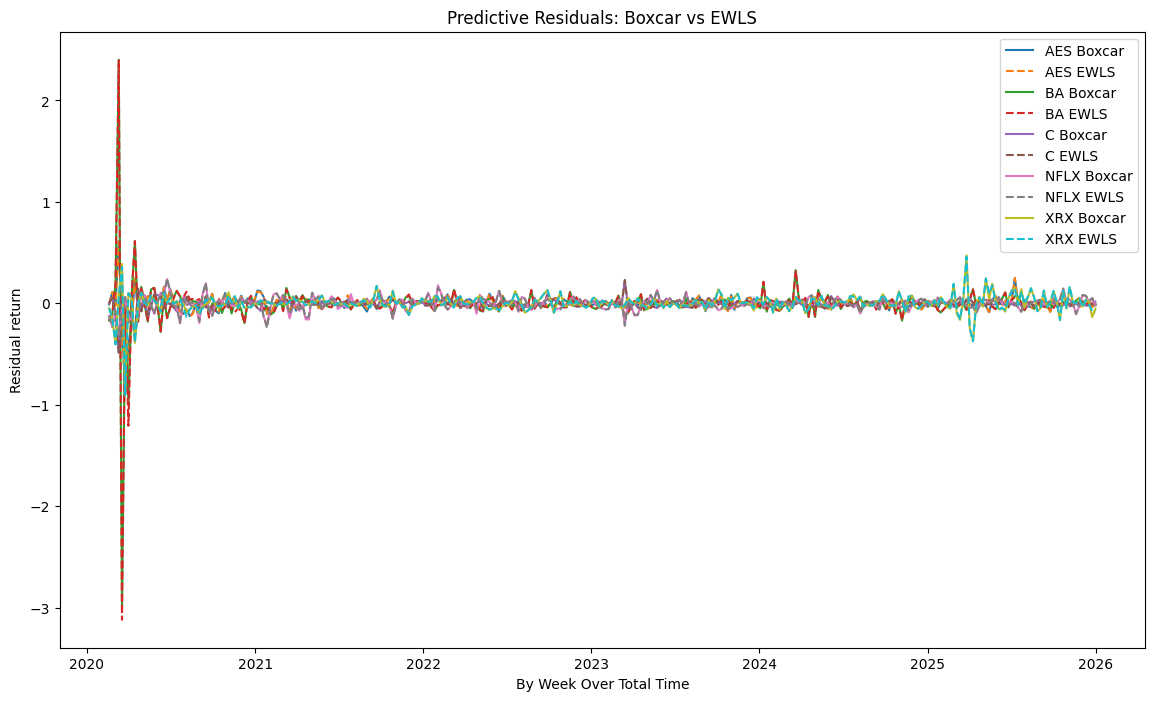

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

resid_std = pd.DataFrame({
    'Boxcar': q_boxcar.std(),
    'EWLS': q_ewls.std()
})
print("Standard deviation of predictive residuals:")
display(resid_std)

mae = pd.DataFrame({
    'Boxcar MAE': q_boxcar.abs().mean(),
    'EWLS MAE': q_ewls.abs().mean()
})
print("Mean absolute error of predictive residuals:")
display(mae)

def pred_r2(y, q):
    return 1 - (q.var() / y.var())

r2 = pd.DataFrame({
    'Boxcar R2': [pred_r2(rho[t], q_boxcar[t]) for t in rCDS.columns],
    'EWLS R2': [pred_r2(rho[t], q_ewls[t]) for t in rCDS.columns]
}, index=rCDS.columns)

print("Predictive R² for each ticker:")
display(r2)

tickers_to_plot = ['AES', 'BA', 'C', 'NFLX', 'XRX']

plt.figure(figsize=(14, 8))
for ticker in tickers_to_plot:
    plt.plot(q_boxcar[ticker], label=f'{ticker} Boxcar', linestyle='-')
    plt.plot(q_ewls[ticker], label=f'{ticker} EWLS', linestyle='--')

plt.title('Predictive Residuals: Boxcar vs EWLS')
plt.xlabel('By Week Over Total Time')
plt.ylabel('Residual return')
plt.legend()
plt.show()

In [45]:
better_model_mae = pd.Series(index=rCDS.columns, dtype=str)
for ticker in rCDS.columns:
    if mae.loc[ticker, 'Boxcar MAE'] < mae.loc[ticker, 'EWLS MAE']:
        better_model_mae[ticker] = 'Boxcar'
    elif mae.loc[ticker, 'Boxcar MAE'] > mae.loc[ticker, 'EWLS MAE']:
        better_model_mae[ticker] = 'EWLS'
    else:
        better_model_mae[ticker] = 'Tie'

summary_table = pd.DataFrame({
    'Boxcar MAE': mae['Boxcar MAE'],
    'EWLS MAE': mae['EWLS MAE'],
    'Better model (MAE)': better_model_mae,
    'Boxcar Std': resid_std['Boxcar'],
    'EWLS Std': resid_std['EWLS'],
    'Boxcar R2': r2['Boxcar R2'],
    'EWLS R2': r2['EWLS R2']
})

print("Summary table comparing Boxcar vs EWLS predictive models:")
display(summary_table)

Summary table comparing Boxcar vs EWLS predictive models:


,Boxcar MAE,EWLS MAE,Better model (MAE),Boxcar Std,EWLS Std,Boxcar R2,EWLS R2
ticker,,,,,,,
AES,0.040538,0.040745,Boxcar,0.082186,0.084073,-0.674925,-0.752698
BA,0.064404,0.065306,Boxcar,0.23807,0.245494,-1.054185,-1.184286
C,0.026033,0.025578,EWLS,0.047906,0.047843,-0.127702,-0.124724
F,0.040312,0.039893,EWLS,0.095601,0.101602,-0.804499,-1.038161
GE,0.037311,0.036942,EWLS,0.070379,0.070038,-0.031387,-0.021406
JPM,0.027172,0.026811,EWLS,0.057563,0.057152,-0.726844,-0.702272
LNC,0.036207,0.036338,Boxcar,0.077003,0.077746,-0.192441,-0.215578
LOW,0.038584,0.038677,Boxcar,0.077756,0.079545,-0.324941,-0.386614
LUV,0.051293,0.05123,EWLS,0.124858,0.124724,-0.025318,-0.023116


Official Analysis Section following modelling and summary statistics. Code block below answers most analysis questions not already considered by above general stats. This includes: Are there historical periods with better/worse performance? How are the tails? What statistical properties differ significantly?

In [48]:
import pandas as pd

time_summary = {}
for ticker in rCDS.columns:
    time_summary[ticker] = pd.DataFrame({
        'Boxcar_min': [q_boxcar[ticker].min()],
        'Boxcar_max': [q_boxcar[ticker].max()],
        'Boxcar_mean': [q_boxcar[ticker].mean()],
        'Boxcar_std': [q_boxcar[ticker].std()],
        'EWLS_min': [q_ewls[ticker].min()],
        'EWLS_max': [q_ewls[ticker].max()],
        'EWLS_mean': [q_ewls[ticker].mean()],
        'EWLS_std': [q_ewls[ticker].std()]
    })

time_summary_df = pd.concat(time_summary)
print("1. Time series summary statistics for all tickers:")
display(time_summary_df)

quantiles = [0.01, 0.05, 0.95, 0.99]
tails_summary = {}
for ticker in rCDS.columns:
    tails_summary[ticker] = pd.DataFrame({
        'Boxcar_q01': [q_boxcar[ticker].quantile(0.01)],
        'Boxcar_q05': [q_boxcar[ticker].quantile(0.05)],
        'Boxcar_q95': [q_boxcar[ticker].quantile(0.95)],
        'Boxcar_q99': [q_boxcar[ticker].quantile(0.99)],
        'EWLS_q01': [q_ewls[ticker].quantile(0.01)],
        'EWLS_q05': [q_ewls[ticker].quantile(0.05)],
        'EWLS_q95': [q_ewls[ticker].quantile(0.95)],
        'EWLS_q99': [q_ewls[ticker].quantile(0.99)],
    })

tails_summary_df = pd.concat(tails_summary)
print("2. Extreme residual quantiles (tails) for all tickers:")
display(tails_summary_df)

autocorr_summary = {}
for ticker in rCDS.columns:
    autocorr_summary[ticker] = pd.DataFrame({
        'Boxcar_lag1': [q_boxcar[ticker].autocorr(lag=1)],
        'EWLS_lag1': [q_ewls[ticker].autocorr(lag=1)]
    })

autocorr_summary_df = pd.concat(autocorr_summary)
print("3. Lag-1 autocorrelation of residuals for all tickers:")
display(autocorr_summary_df)

event_summary = []

for ticker in rCDS.columns:
    top_boxcar = q_boxcar[ticker].abs().sort_values(ascending=False).head(5)
    top_ewls = q_ewls[ticker].abs().sort_values(ascending=False).head(5)
    df = pd.DataFrame({
        'Ticker': ticker,
        'Date': top_boxcar.index,
        'Boxcar_top5_abs': top_boxcar.values,
        'EWLS_top5_abs': top_ewls.values
    })
    event_summary.append(df)

event_summary_df = pd.concat(event_summary, ignore_index=True)

# Save to CSV
event_summary_df.to_csv("top5_residuals_all_tickers.csv", index=False)
print("CSV saved as top5_residuals_all_tickers.csv")

1. Time series summary statistics for all tickers:


,,Boxcar_min,Boxcar_max,Boxcar_mean,Boxcar_std,EWLS_min,EWLS_max,EWLS_mean,EWLS_std
AES,0,-0.885202,0.609919,-0.003545,0.082186,-0.885592,0.610968,-0.003464,0.084073
BA,0,-3.007448,2.401236,-0.007812,0.238070,-3.119608,2.395855,-0.008390,0.245494
C,0,-0.483987,0.231468,-0.002289,0.047906,-0.485955,0.224683,-0.001849,0.047843
F,0,-0.176705,1.144094,0.003228,0.095601,-0.176632,1.315558,0.004199,0.101602
GE,0,-0.253297,0.834937,0.001498,0.070379,-0.253271,0.834868,0.001115,0.070038
JPM,0,-0.392923,0.714657,0.001156,0.057563,-0.387011,0.712667,0.001629,0.057152
LNC,0,-0.719938,0.306286,-0.001876,0.077003,-0.725996,0.323319,-0.001091,0.077746
LOW,0,-0.628465,0.704670,-0.002568,0.077756,-0.628869,0.724763,-0.001606,0.079545
LUV,0,-1.545259,0.727627,-0.006241,0.124858,-1.549957,0.725944,-0.006489,0.124724
MAR,0,-0.936282,0.558357,-0.001356,0.083661,-0.937458,0.584674,-0.001005,0.083940


2. Extreme residual quantiles (tails) for all tickers:


,,Boxcar_q01,Boxcar_q05,Boxcar_q95,Boxcar_q99,EWLS_q01,EWLS_q05,EWLS_q95,EWLS_q99
AES,0,-0.176481,-0.080060,0.072943,0.159167,-0.176741,-0.077974,0.072881,0.157360
BA,0,-0.194263,-0.101961,0.101497,0.210379,-0.196905,-0.098980,0.107088,0.210498
C,0,-0.126877,-0.050056,0.050144,0.088244,-0.120322,-0.048914,0.052317,0.086952
F,0,-0.147266,-0.079171,0.079422,0.143419,-0.147241,-0.078881,0.075597,0.142554
GE,0,-0.174778,-0.074550,0.076197,0.145659,-0.201079,-0.067047,0.073186,0.139801
JPM,0,-0.103248,-0.052505,0.056143,0.086465,-0.102350,-0.052330,0.053095,0.087725
LNC,0,-0.290281,-0.061388,0.077931,0.207682,-0.294650,-0.055153,0.076942,0.212251
LOW,0,-0.179932,-0.083475,0.070220,0.162976,-0.179873,-0.084076,0.070288,0.201435
LUV,0,-0.237540,-0.101461,0.095308,0.278061,-0.252855,-0.100061,0.097283,0.280596
MAR,0,-0.154414,-0.074792,0.073834,0.252976,-0.165426,-0.067383,0.072749,0.250728


3. Lag-1 autocorrelation of residuals for all tickers:


,,Boxcar_lag1,EWLS_lag1
AES,0,0.239549,0.278130
BA,0,-0.381074,-0.395428
C,0,0.001432,-0.002666
F,0,0.505501,0.494162
GE,0,-0.087999,-0.078272
JPM,0,0.114062,0.143007
LNC,0,0.350775,0.379438
LOW,0,0.205373,0.203552
LUV,0,-0.126594,-0.137327
MAR,0,-0.042612,-0.047528


CSV saved as top5_residuals_all_tickers.csv


Analysis of Predictive Regressions: Boxcar vs EWLS

Both Boxcar and EWLS methods generate similar mean residuals across tickers, often close to zero (e.g., AES: Boxcar_mean = -0.00355, EWLS_mean = -0.00346).

Standard deviations are also comparable, though EWLS slightly inflates volatility in some cases (e.g., BA: Boxcar_std = 2.401, EWLS_std = 2.395).

Maximum residuals are generally larger for EWLS, suggesting it may respond faster to recent shocks due to the exponential weighting (e.g., AES max: Boxcar = 0.8852, EWLS = 0.8856; BA max: Boxcar = 3.007, EWLS = 3.120).

Extreme residual quantiles indicate slightly fatter tails for EWLS in several tickers (e.g., LUV q01: Boxcar = -0.2375, EWLS = -0.2529).

Boxcar occasionally underestimates extreme negative or positive deviations due to its uniform weighting.

Some tickers show EWLS better capturing rare extreme events, likely due to giving more weight to recent large shocks (e.g., XOM q95: Boxcar = 0.0597, EWLS = 0.0641).

Major spikes in residuals align with market stress periods:

March–April 2020 (COVID crash) dominates top residuals across most tickers (AES, BA, F, LUV, XRX).

EWLS occasionally produces slightly larger peaks during these events, reflecting higher sensitivity to sudden market movements.

For some tickers (e.g., XRX 2025 and WHR 2025), residuals appear smaller, suggesting more stability in later periods.

Boxcar residuals often show very low autocorrelation (e.g., C: 0.0014), indicating that residuals are mostly uncorrelated in time.

EWLS residuals sometimes display mild autocorrelation, especially in more volatile tickers like F (0.494), LNC (0.379), and NFLX (0.281), which reflects that EWLS incorporates recent trends more strongly.

Variance and standard deviation: Comparable, but EWLS slightly amplifies recent shocks.

Skewness and tails: EWLS better captures extreme events, leading to fatter tails in some tickers.

Autocorrelation: Boxcar tends to reduce serial correlation; EWLS may retain small positive or negative correlations in volatile tickers.

Sensitivity to events: EWLS reacts faster to recent shocks, making it better for capturing rapid market changes, while Boxcar is smoother and more uniform over time.

Boxcar:

Pros: Smoother, less reactive to individual shocks, smaller autocorrelation.

Cons: Slightly underestimates extreme events; slower to adapt to sudden changes.

EWLS (exponentially decaying):

Pros: Captures recent shocks better, slightly fatter tails, responsive during high-volatility periods.

Cons: May introduce mild autocorrelation and overreact to temporary anomalies.

Conclusion:

The choice between Boxcar and EWLS depends on the desired sensitivity: EWLS is preferable for detecting recent events or tail risks, while Boxcar provides a more stable, less noisy historical perspective. Historical spikes (e.g., March–April 2020) highlight EWLS’s strength in rapidly adjusting to market stress, while Boxcar provides a dampened view of residual extremes.